In [2]:
from sklearn.datasets import load_svmlight_file
from mpl_toolkits.mplot3d import Axes3D
from sklearn.preprocessing import StandardScaler, OneHotEncoder
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA
import numpy as np

In [3]:
file_path = "dataset/wine.data"

columns = [
    "Class", "Alcohol", "Malic acid", "Ash", "Alcalinity of ash", "Magnesium",
    "Total phenols", "Flavanoids", "Nonflavanoid phenols", "Proanthocyanins",
    "Color intensity", "Hue", "OD280/OD315", "Proline"
]

# Загружаем датасет
df = pd.read_csv(file_path, header=None, names=columns)


X = df.iloc[:, 1:] 
y = df.iloc[:, 0]   



In [4]:
# Нормализация (StandardScaler)
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)
X_scaled_df = pd.DataFrame(X_scaled, columns=X.columns)


In [5]:
# Применяем PCA без ограничения на число компонент
pca = PCA()
X_pca = pca.fit_transform(X_scaled)
# Получаем собственные векторы (главные компоненты)
eigenvectors = pca.components_

# Получаем собственные значения (доля объясненной дисперсии)
eigenvalues = pca.explained_variance_


In [6]:
eigen_df = pd.DataFrame(
    data=eigenvectors,
    columns=X.columns,
    index=[f"PC{i+1}" for i in range(len(eigenvalues))]
)
eigen_df["Eigenvalue"] = eigenvalues  # Добавляем столбец с собственными значениями

print("Таблица собственных значений и векторов:")
print(eigen_df)

Таблица собственных значений и векторов:
       Alcohol  Malic acid       Ash  Alcalinity of ash  Magnesium  \
PC1   0.144329   -0.245188 -0.002051          -0.239320   0.141992   
PC2   0.483652    0.224931  0.316069          -0.010591   0.299634   
PC3  -0.207383    0.089013  0.626224           0.612080   0.130757   
PC4  -0.017856    0.536890 -0.214176           0.060859  -0.351797   
PC5  -0.265664    0.035214 -0.143025           0.066103   0.727049   
PC6   0.213539    0.536814  0.154475          -0.100825   0.038144   
PC7  -0.056396    0.420524 -0.149171          -0.286969   0.322883   
PC8   0.396139    0.065827 -0.170260           0.427970  -0.156361   
PC9  -0.508619    0.075283  0.307694          -0.200449  -0.271403   
PC10  0.211605   -0.309080 -0.027125           0.052799   0.067870   
PC11 -0.225917    0.076486 -0.498691           0.479314   0.071289   
PC12 -0.266286    0.121696 -0.049622          -0.055743   0.062220   
PC13  0.014970    0.025964 -0.141218           0.

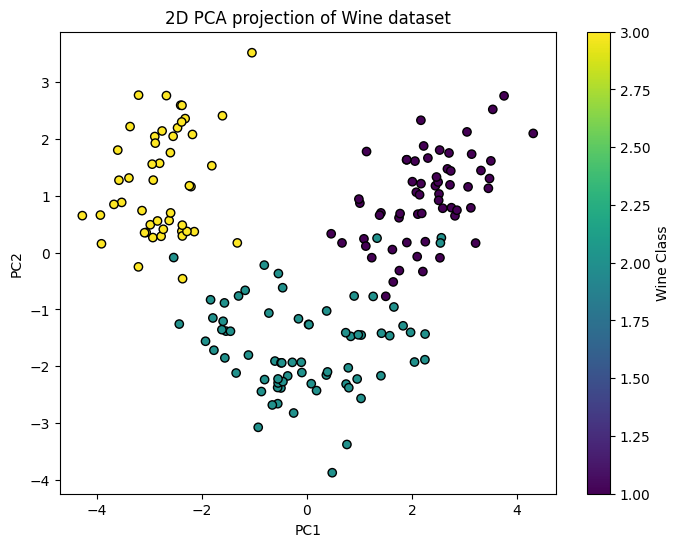

In [7]:
# Применяем PCA с 2 главными компонентами
pca_2d = PCA(n_components=2)
X_pca_2d = pca_2d.fit_transform(X_scaled)

# Визуализация данных
plt.figure(figsize=(8, 6))
plt.scatter(X_pca_2d[:, 0], X_pca_2d[:, 1], c=y, cmap='viridis', edgecolors='k')
plt.xlabel("PC1")
plt.ylabel("PC2")
plt.title("2D PCA projection of Wine dataset")
plt.colorbar(label="Wine Class")
plt.show()


In [13]:
from mpl_toolkits.mplot3d import Axes3D
import matplotlib
matplotlib.use('nbagg')
# Применяем PCA с 3 главными компонентами
pca_3d = PCA(n_components=3)
X_pca_3d = pca_3d.fit_transform(X_scaled)

# Визуализация в 3D
fig = plt.figure(figsize=(10, 7))
ax = fig.add_subplot(111, projection='3d')
sc = ax.scatter(X_pca_3d[:, 0], X_pca_3d[:, 1], X_pca_3d[:, 2], c=y, cmap='viridis', edgecolors='k')

ax.set_xlabel("PC1")
ax.set_ylabel("PC2")
ax.set_zlabel("PC3")
ax.set_title("3D PCA projection of Wine dataset")
plt.colorbar(sc, label="Wine Class")
plt.show()


<IPython.core.display.Javascript object>